In [1]:
import pandas as pd
import urllib3
import json
from statistics import variance
import numpy as np
from statsmodels.stats.stattools import jarque_bera
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
api_key = '3e17d2b777a13feee4c1243985cdc7c4'

In [3]:
'''
def commodities():
    http = urllib3.PoolManager()
    symbol ='AAPL'  
    # Send GET request
    response = http.request('GET', f'https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?apikey={api_key}')
    price_data = response.data.decode('utf-8')
    price_data = json.loads(price_data)
    all_data= []
    if 'historical' in price_data:  # Checking if 'historical' data is present
            for data_point in price_data['historical']:
                data_point['symbol'] = symbol  # Adding the symbol to each historical data point
                all_data.append(data_point)
    COMM_Price = pd.DataFrame(all_data)

    return COMM_Price

stock= commodities()
'''

"\ndef commodities():\n    http = urllib3.PoolManager()\n    symbol ='AAPL'  \n    # Send GET request\n    response = http.request('GET', f'https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?apikey={api_key}')\n    price_data = response.data.decode('utf-8')\n    price_data = json.loads(price_data)\n    all_data= []\n    if 'historical' in price_data:  # Checking if 'historical' data is present\n            for data_point in price_data['historical']:\n                data_point['symbol'] = symbol  # Adding the symbol to each historical data point\n                all_data.append(data_point)\n    COMM_Price = pd.DataFrame(all_data)\n\n    return COMM_Price\n\nstock= commodities()\n"

In [4]:
stock =pd.read_csv('SPY.csv')

In [5]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-01-02,88.849998,91.300003,88.540001,91.070000,61.583008,44516300
1,2003-01-03,90.910004,91.379997,90.500000,91.349998,61.772354,32222600
2,2003-01-06,91.239998,93.489998,91.169998,92.959999,62.861076,40984500
3,2003-01-07,92.900002,93.370003,92.199997,92.730003,62.705544,38640400
4,2003-01-08,92.199997,92.400002,91.050003,91.389999,61.799408,38702200


In [6]:
stock['Dollar Amount'] = stock['Close'] * stock['Volume']

In [7]:
stock['Dollar Threshold'] = stock['Dollar Amount'].mean() *0.25

In [8]:
threshold =stock['Dollar Threshold'].iloc[1]

In [9]:


# Step 2: Aggregate rows based on a threshold
#threshold = 200000  # This is an example threshold; you can set your own
cumsum = 0
bars = []
for i, row in stock.iterrows():
    cumsum += row['Dollar Amount']
    if cumsum > threshold:
        bars.append({
            'Date': row['Date'],
            'Close': row['Close'],  # Here you can apply any aggregation you need, e.g., mean
            'Volume': row['Volume'],  # Same here, e.g., sum
        })
        cumsum = 0  # reset the counter

# Convert the aggregated bars back to a DataFrame
dollar_bars_df = pd.DataFrame(bars)

print(dollar_bars_df)

            Date       Close     Volume
0     2003-01-03   91.349998   32222600
1     2003-01-07   92.730003   38640400
2     2003-01-09   92.809998   34804900
3     2003-01-13   93.029999   31649900
4     2003-01-15   92.400002   33511800
...          ...         ...        ...
4913  2023-08-04  446.809998  100052300
4914  2023-08-07  450.709991   58357500
4915  2023-08-08  448.750000   71361300
4916  2023-08-09  445.750000   78789600
4917  2023-08-10  445.910004   92941200

[4918 rows x 3 columns]


In [10]:
'''
def form_tick_bars(df):
    tick_need =20
    closed =[]
    for idx, value in df.iterrows():
        tick_count = (idx+1)

        if tick_count %tick_need == 1:
            closed.append(value.Close)            
    
    closes = np.array(closed)
    return closes
'''    

'\ndef form_tick_bars(df):\n    tick_need =20\n    closed =[]\n    for idx, value in df.iterrows():\n        tick_count = (idx+1)\n\n        if tick_count %tick_need == 1:\n            closed.append(value.Close)            \n    \n    closes = np.array(closed)\n    return closes\n'

In [11]:
dollar_bar_arr =dollar_bars_df.Close.values

In [12]:
np.std(dollar_bar_arr)

104.69730676045862

In [13]:
jb_stat, p_value, _, _ = jarque_bera(dollar_bar_arr)

In [14]:
jb_stat

722.4923854580621

In [15]:
p_value

1.2964981136425251e-157

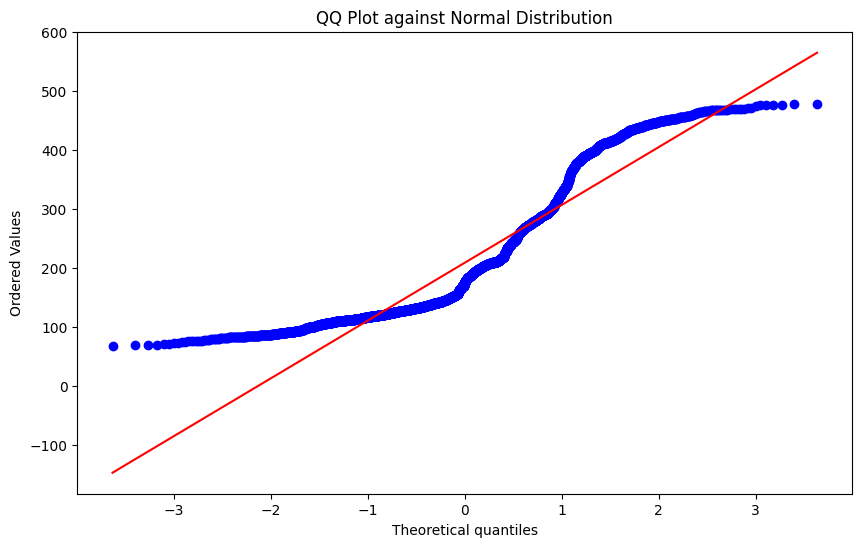

In [16]:
plt.figure(figsize=(10, 6))
probplot(dollar_bar_arr, dist="norm", plot=plt)
plt.title("QQ Plot against Normal Distribution")
plt.show()

<Axes: ylabel='Count'>

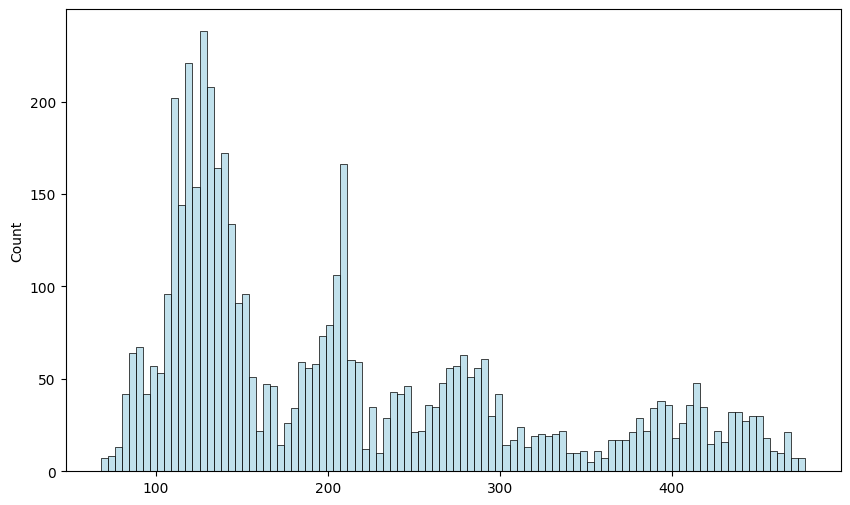

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(dollar_bar_arr, bins=100, kde=False, label="Data Histogram", color='lightblue', edgecolor='black')

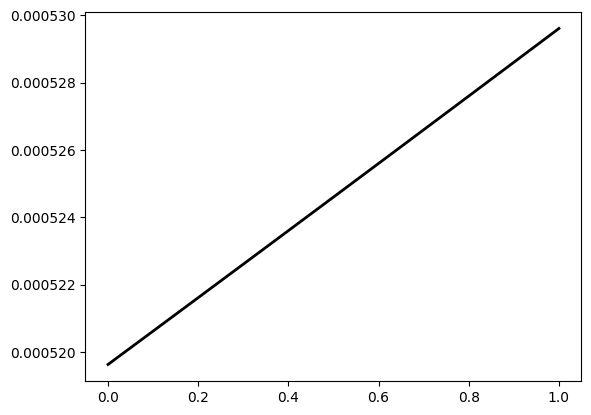

In [25]:
mean, std = np.mean(dollar_bar_arr), np.std(dollar_bar_arr)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2, label="Normal Distribution")

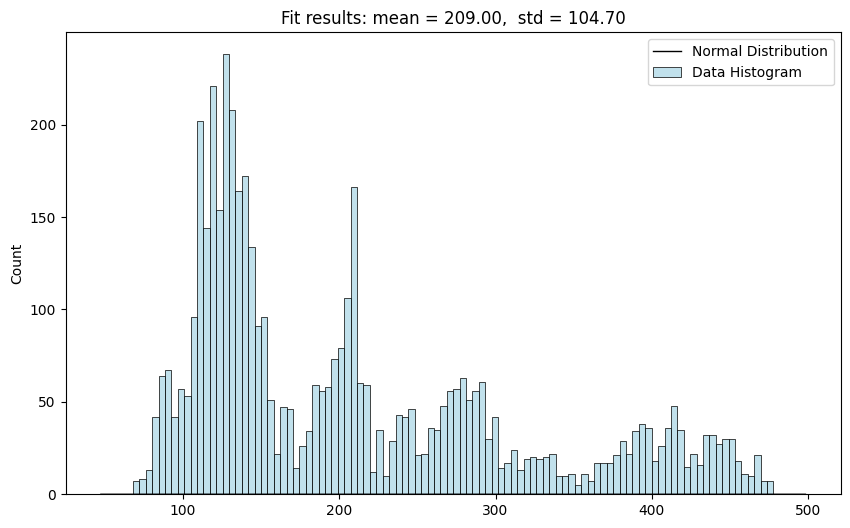

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

data = dollar_bar_arr # your data

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=100, kde=False, label="Data Histogram", color='lightblue', edgecolor='black')

# Overlaying the normal distribution
mean, std = np.mean(data), np.std(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 60)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=1, label="Normal Distribution")

title = "Fit results: mean = %.2f,  std = %.2f" % (mean, std)
plt.title(title)
plt.legend()
plt.show()